In [92]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import scipy
import numpy as np
%matplotlib inline

Essas são visualizações relacionadas à configuração 100 indivíduos e 500 gerações variando a forma de seleção. Já havia feito a seleção roleta para os primeiros testes (notebook 1). Agora, também temos resultados para a seleção por torneio e lexicase.

# 1 - Fitness por execução

In [2]:
results_folder_path = pathlib.Path('../../results/')

In [52]:
def get_fitness_data_per_config(folders_paths) -> list[dict]:
    data_per_config = dict()
    for target_folder in folders_paths:
        fitness_stats_path = target_folder / 'fitness_stats.csv'
        print(fitness_stats_path)
        stats_df = pd.read_csv(fitness_stats_path)
        folder_name_splitted = str(target_folder).split('/')[-1].split('_')
        if len(folder_name_splitted) < 3:
            config_name = 'roul'
        else:
            config_name = folder_name_splitted[-1]
        
        data_per_config[config_name] = stats_df
    return data_per_config

In [70]:
results_folders = list(results_folder_path.glob("synth1/100pop_500gen*"))
data_per_selection = get_fitness_data_per_config(results_folders)

../../results/synth1/100pop_500gen_lexi/fitness_stats.csv
../../results/synth1/100pop_500gen/fitness_stats.csv
../../results/synth1/100pop_500gen_tour/fitness_stats.csv


In [71]:
data_per_selection['lexi'].head()

,train_fit,test_fit,train_time_seconds,random_seed
0,1.014195,1.458739,525.966222,497
1,2.111900,3.508930,414.361752,288
2,3.205432,4.292603,302.270349,273
3,0.918287,4.544429,401.521371,420
4,5.034824,7.853819,754.379412,368


In [72]:
def plot_fitness_results(data_dict, num_runs=30, base_dados='synth1'):
    train_data_colors = {'lexi':'red', 
                     'roul':'green', 
                     'tour':'grey'}

    test_data_colors = {'lexi':'orange', 
                     'roul':'cyan', 
                     'tour':'black'}

    x = range(num_runs)
    fig, ax = plt.subplots(figsize=(9, 6))
    for config, data in data_dict.items():
            ax.plot(x, data['train_fit'], color=train_data_colors[config], label=config+" train")
            ax.plot(x, data['test_fit'], color=test_data_colors[config], label=config+" test")

    plt.title(f"Melhor Fitness treino e teste base {base_dados} variando seleções")
    plt.xlabel("Número da Execução")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()

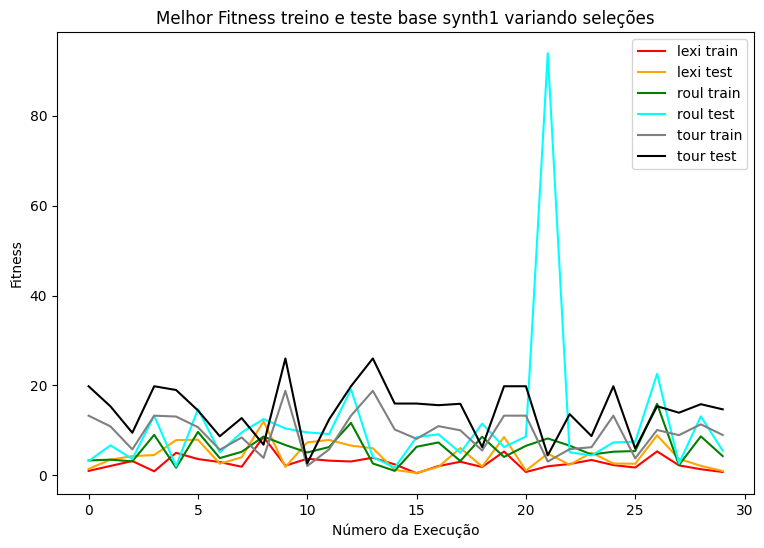

In [73]:
plot_fitness_results(data_per_selection)

In [74]:
def get_trimmed_mean_train_test_fitness(data_dict, trim=0.05)-> dict[str, dict]:
    config_dict_results = dict()
    for config, data in data_dict.items():
        config_dict_results[config] = dict()
        config_dict_results[config]['train'] = scipy.stats.trim_mean(data.train_fit, trim)
        config_dict_results[config]['test'] = scipy.stats.trim_mean(data.test_fit, trim)
    return config_dict_results

In [75]:
mean_fit_results = get_trimmed_mean_train_test_fitness(data_per_selection)
mean_fit_results

{'lexi': {'train': 2.6587480642207635, 'test': 4.292271328760312},
 'roul': {'train': 5.80026628373831, 'test': 8.600472132319073},
 'tour': {'train': 9.50961796297047, 'test': 14.522112823555352}}

In [76]:
train_results = [data['train'] for config, data in mean_fit_results.items()]
test_results = [data['test'] for config, data in mean_fit_results.items()]
results_dict = {'train': train_results, 'test':test_results}
results_df = pd.DataFrame(results_dict)
results_df.index = ['lexicase', 'roullete', 'tournament']

In [77]:
results_df

,train,test
lexicase,2.658748,4.292271
roullete,5.800266,8.600472
tournament,9.509618,14.522113


Text(0, 0.5, 'Fitness média')

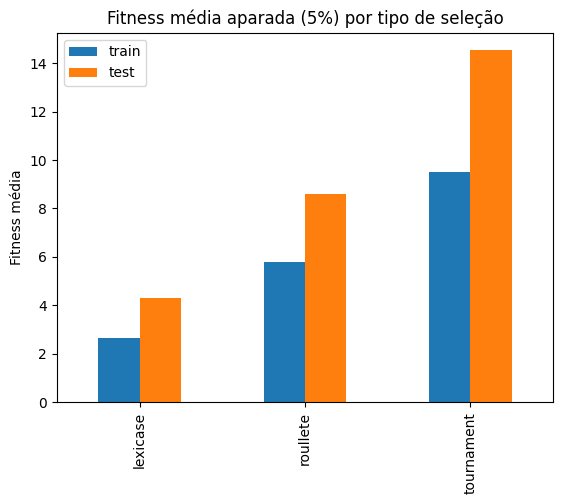

In [78]:
results_df.plot(kind='bar')
plt.title("Fitness média aparada (5%) por tipo de seleção")
plt.ylabel("Fitness média")

A seleção por Lexicase é claramente muito melhor do que as outras duas sendo que a fitness média no seu teste é menor do que a fitness média do treino da roleta e metade da de treino do torneio.

# 2 - Tempo de execução

In [79]:
def get_trimmed_mean_train_time(data_dict, trim=0.05)-> dict[str, dict]:
    config_dict_results = dict()
    for config, data in data_dict.items():
        config_dict_results[config] = scipy.stats.trim_mean(data.train_time_seconds, trim)
    return config_dict_results

In [80]:
mean_time = get_trimmed_mean_train_time(data_per_selection)
mean_time

{'lexi': 397.40130453450337,
 'roul': 53.540891902787344,
 'tour': 62.60870445626123}

In [81]:
time_df = pd.DataFrame(mean_time, index=['mean_time']).T
time_df

,mean_time
lexi,397.401305
roul,53.540892
tour,62.608704


A seleção por Lexicase, apesar de ter resultados de fitness bem melhores, executa cerca de 8 vezes mais lenta do que a seleção por roleta e 6 vezes mais lenta do que a por torneio.

# 3 - Best fitness ao longo das gerações

In [103]:
def get_500_gen_stats_df_dict_by_run_of_folder(folder):
    files = list(folder.glob("stats*"))
    stats_dict = dict()
    for file in files:
        file_num = str(file).split('_')[-1].split('.')[0]
        stats_dict[int(file_num)] = pd.read_csv(file)
    return stats_dict

In [104]:
results_folders

[PosixPath('../../results/synth1/100pop_500gen_lexi'),
 PosixPath('../../results/synth1/100pop_500gen'),
 PosixPath('../../results/synth1/100pop_500gen_tour')]

In [105]:
lexi_dict_dfs = get_500_gen_stats_df_dict_by_run_of_folder(results_folders[0])
roul_dict_dfs = get_500_gen_stats_df_dict_by_run_of_folder(results_folders[1])
tour_dict_dfs = get_500_gen_stats_df_dict_by_run_of_folder(results_folders[2])

In [106]:
lexi_dict_dfs.keys()

dict_keys([21, 11, 6, 25, 7, 15, 19, 14, 12, 17, 20, 8, 23, 9, 13, 22, 28, 18, 27, 3, 10, 5, 29, 2, 16, 26, 4, 0, 24, 1])

In [90]:
def get_line_and_col_of_runs(df_dict, target_line, target_cols:list):
    results_list_of_dicts = list()
    for df_num, df in df_dict.items():
        results_list_of_dicts.append(df.iloc[target_line][target_cols].to_dict())
    
    return pd.DataFrame(results_list_of_dicts)
def get_col_stats_from_dfs_dict(df_dict, target_col):
    records_list = list()
    for gen in range(500):
        curr_values = get_line_and_col_of_runs(df_dict, gen, [target_col]).values.flatten()
        min_value = np.min(curr_values)
        max_value = np.max(curr_values)
        mean_value = np.mean(curr_values)
        new_record = {'min_value':min_value, 'max_value':max_value, 'mean_value':mean_value}
        records_list.append(new_record)

    return pd.DataFrame.from_records(records_list)

In [108]:
best_fit_per_gen_lexi_df = get_col_stats_from_dfs_dict(lexi_dict_dfs, 'best_fit')
best_fit_per_gen_roul_df = get_col_stats_from_dfs_dict(roul_dict_dfs, 'best_fit')
best_fit_per_gen_tour_df = get_col_stats_from_dfs_dict(tour_dict_dfs, 'best_fit')

In [97]:
def plot_fill_between(stats_df, my_axs, label:str):
    x = range(len(stats_df))
    y = stats_df['mean_value']
    y1 = stats_df['min_value']
    y2 = stats_df['max_value']
    my_axs.plot(x, y, '-', label=label)
    my_axs.fill_between(x, y1, y2, alpha=0.2)

Text(0.5, 1.0, 'Melhor fitness média para 30 runs e 100 indivíduos')

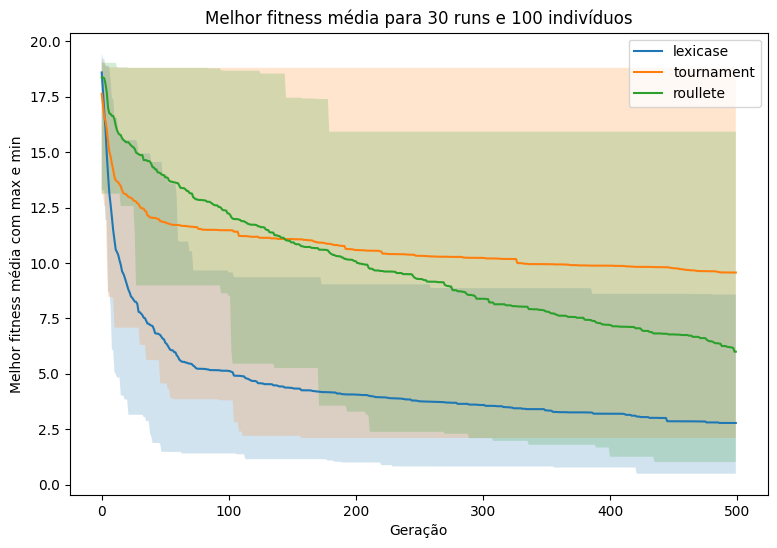

In [149]:
fig, ax = plt.subplots(figsize=(9, 6))
plot_fill_between(best_fit_per_gen_lexi_df, ax, 'lexicase')
plot_fill_between(best_fit_per_gen_tour_df, ax, 'tournament')
plot_fill_between(best_fit_per_gen_roul_df, ax, 'roullete')

ax.legend()
ax.set_ylabel("Melhor fitness média com max e min")
ax.set_xlabel("Geração")
ax.set_title("Melhor fitness média para 30 runs e 100 indivíduos")

O gráfico mostra que a seleção por lexicase possui uma capacidade muito boa de se aproximar do melhor indivíduo em cerca de 100 gerações mas ainda assim ser capaz de melhorá-lo e não ficar em um platô. Assim, na média, com cerca de 200 iterações ela já é capaz de aproximar suficientemente o melhor indivíduo.

A seleção por roleta, apesar de ter uma pressão seletiva maior, parece estar diverso o suficiente para que tenha um movimento de melhoria constante em média. No pior caso, com cerca de 180 gerações, não conseguimos melhorar a sua solução.

Já a seleção por torneio, no seu pior caso, não conseguiu melhorar em quase nada a solução inicial, mesmo com torneios de tamanho k=2. Em média, ela possui um movimento semelhante à seleção por lexicase mas com força menor de melhoria da solução.

# 4 - Comparando melhor execução dos três métodos de seleção

In [135]:
def get_best_test_line_for_selection(select_type):
    target = f'{select_type}'
    config = data_per_selection[select_type]
    print(f"Melhor linha para seleção {select_type}: ")
    best_run = config[config.test_fit == config.test_fit.min()] 
    print(best_run)
    return best_run

In [136]:
lexi_best_run_stats = get_best_test_line_for_selection('lexi')
roul_best_run_stats = get_best_test_line_for_selection('roul')
tour_best_run_stats = get_best_test_line_for_selection('tour')

Melhor linha para seleção lexi: 
    train_fit  test_fit  train_time_seconds  random_seed
15   0.494532  0.560105          560.968238          625
Melhor linha para seleção roul: 
    train_fit  test_fit  train_time_seconds  random_seed
14   1.018772  1.740526           58.360054          568
Melhor linha para seleção tour: 
    train_fit  test_fit  train_time_seconds  random_seed
10   2.106427  2.699687           94.888649          761


Text(0, 0.5, 'Fitness')

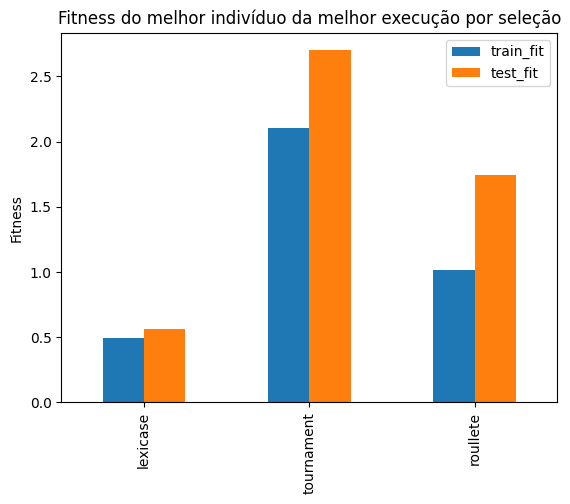

In [146]:
records = [lexi_best_run_stats[['train_fit','test_fit']].iloc[0].to_dict(),
            tour_best_run_stats[['train_fit','test_fit']].iloc[0].to_dict(),
            roul_best_run_stats[['train_fit','test_fit']].iloc[0].to_dict()]
best_run_stats_df = pd.DataFrame.from_records(records)
best_run_stats_df.index = ['lexicase', 'tournament', 'roullete']
best_run_stats_df.plot(kind='bar')
plt.title("Fitness do melhor indivíduo da melhor execução por seleção")
plt.ylabel("Fitness")

In [110]:
best_lexi_run = lexi_dict_dfs[15]
best_roul_run = roul_dict_dfs[14]
best_tour_run = tour_dict_dfs[10]

In [111]:
best_lexi_run.head()

,best_fit,worst_fit,std_fit,mean_fit,n_unique_inds,better_than_parents,worst_than_parents
0,19.056222,575.927291,55.195741,29.658354,78,29,31
1,18.908178,118.048588,18.629818,32.404583,46,24,30
2,18.399670,118.048588,17.138709,27.818998,41,22,32
3,18.399670,128.883269,29.497521,35.689638,43,29,29
4,17.431366,106.078966,19.310163,28.979979,46,25,23


In [126]:
def plot_run_fill_between(stats_df, my_axs, label:str):
    x = range(len(stats_df))
    min_y = stats_df['best_fit']
    std_y = stats_df['std_fit']
    mean_y = stats_df['mean_fit']
    my_axs.plot(x, min_y, '-', label=label)
    my_axs.fill_between(x, min_y, mean_y, alpha=0.2)

Text(0.5, 1.0, 'Best Fitness ao longo das gerações para as melhores execuções')

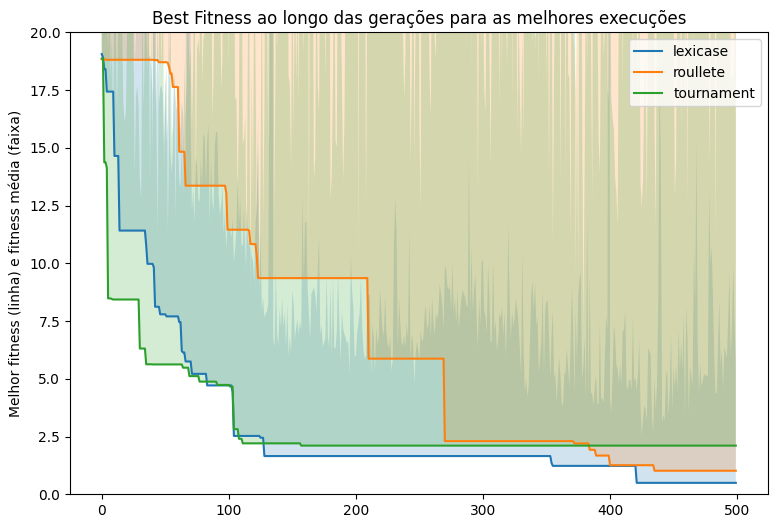

In [151]:
fig, ax = plt.subplots(figsize=(9, 6))
plot_run_fill_between(best_lexi_run, ax, 'lexicase')
plot_run_fill_between(best_roul_run, ax, 'roullete')
plot_run_fill_between(best_tour_run, ax, 'tournament')

ax.set_ylim((0, 20))
ax.legend()
ax.set_ylabel("Melhor fitness (linha) e fitness média (faixa)")
ax.set_title("Best Fitness ao longo das gerações para as melhores execuções")

O gráfico mostra que, para as melhores execuções, o resultado usando de seleção por roleta chega muito próximo do que usa seleção por lexicase, apesar de que a diferença entre a fitness média e a melhor é constantemente menor para o caso lexicase quando comparado com a roleta. Isso indica que, talvez, se escolhermos a seleção por roleta e a permitirmos mais iterações, podemos tentar chegar à performance da seleção Lexicase e em menos tempo de execução. 

Já que usar Lexicase leva cerca de 8 vezes mais tempo do que a Roleta, poderíamos usar de até 4000 gerações e ainda levaríamos o mesmo tempo que o Lexicase. Entretanto, essa hipótese não será testada.

Dessa forma, como a seleção por Roleta, executando cerca de 30 vezes, consegue se aproximar em muito da melhor solução do Lexicase e ser 8 vezes mais barata de computar, escolhi manter essa como a melhor seleção.